# Hierarchical Clustering

Unlike k-means and EM, [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) (HC) doesn't require the user to specify the number of clusters beforehand. Instead it returns an output (typically as a dendrogram- see GIF below), from which the user can decide the appropriate number of clusters (either manually or [algorithmically](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)). If done manually, the user may cut the dendrogram where the merged clusters are too far apart (represented by a long lines in the dendrogram). Alternatively, the user can just return a specific number of clusters (similar to k-means).

![title](https://dashee87.github.io/images/hierarch.gif)

As its name suggests, it constructs a hierarchy of clusters based on proximity (e.g Euclidean distance or Manhattan distance- see GIF below). HC typically comes in two flavours (essentially, bottom up or top down): 

* Divisive: Starts with the entire dataset comprising one cluster that is iteratively split- one point at a time- until each point forms its own cluster.
* Agglomerative: The agglomerative method in reverse- individual points are iteratively combined until all points belong to the same cluster.

Another important concept in HC is the linkage criterion. This defines the distance between clusters as a function of the points in each cluster and determines which clusters are merged/split at each step. That clumsy sentence is neatly illustrated in the GIF below.

![title](https://dashee87.github.io/images/hierarch_1.gif)

Dataset 1
Cluster 0: 990
Cluster 1: 1008
Cluster 2: 1002
Cluster 3: 1000


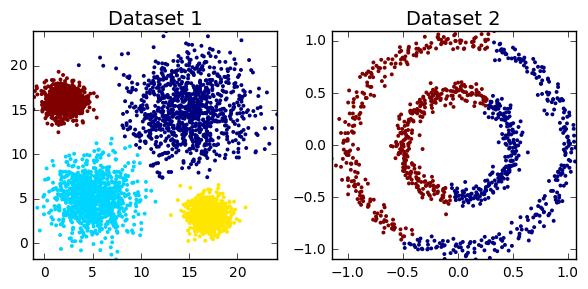

In [29]:
# implementing agglomerative (bottom up) hierarchical clustering
# we're going to specify that we want 4 and 2 clusters, respectively
hc_dataset1 = cluster.AgglomerativeClustering(n_clusters=4, affinity='euclidean', 
                                              linkage='ward').fit_predict(dataset1)
hc_dataset2 = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='average').fit_predict(dataset2)
print("Dataset 1")
print(*["Cluster "+str(i)+": "+ str(sum(hc_dataset1==i)) for i in range(4)], sep='\n')
cluster_plots(dataset1, dataset2, hc_dataset1, hc_dataset2)

You might notice that HC didn't perform so well on the noisy circles. By imposing simple connectivity constraints (points can only cluster with their n(=5) nearest neighbours), HC captures the non-globular structures within the dataset.

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:418: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


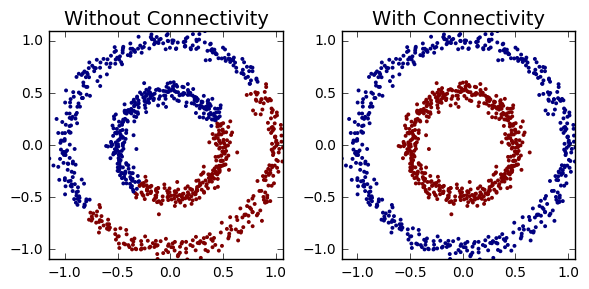

In [11]:
hc_dataset2 = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='complete').fit_predict(dataset2)
connect = kneighbors_graph(dataset2, n_neighbors=5, include_self=False)
hc_dataset2_connectivity = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='complete',connectivity=connect).fit_predict(dataset2)
cluster_plots(dataset2, dataset2,hc_dataset2,hc_dataset2_connectivity,
             title1='Without Connectivity', title2='With Connectivity')

Conveniently, the position of each observation isn't necessary for HC, but rather the distance between each point (e.g. a n x n matrix). However, the main disadvantage of HC is that it requires too much memory for large datasets (that n x n matrix blows up pretty quickly). Divisive clustering is $O(2^n)$, while agglomerative clustering comes in somewhat better at $O(n^2 log(n))$ (though special cases of $O(n^2)$ are available for single and maximum linkage agglomerative clustering).